## Import modules and data

In [1]:
# https://data-flair.training/blogs/stock-price-prediction-machine-learning-project-in-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('../data/GOLD.csv')
df.head()

,Date,Close
0,7/2/2018,13.12
1,7/3/2018,13.33
2,7/5/2018,13.47
3,7/6/2018,13.35
4,7/9/2018,13.27


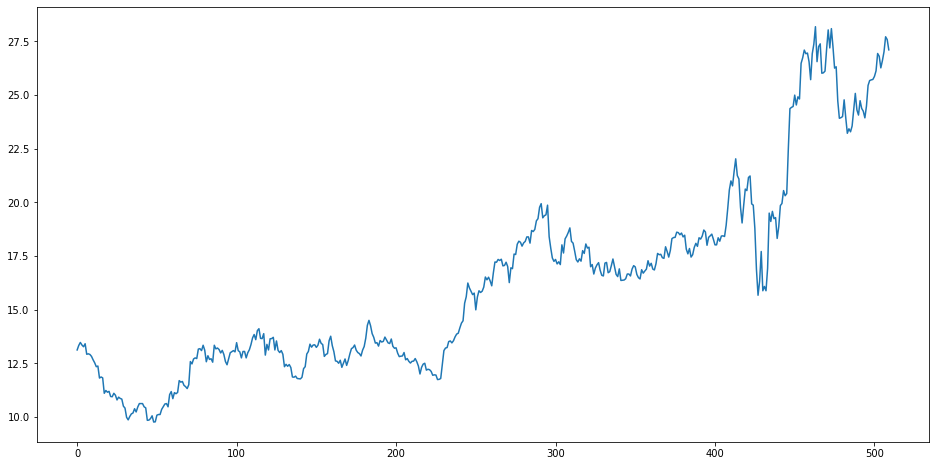

In [3]:
# What historical stock prices actually looked like
df["Date"]=pd.to_datetime(df.Date,format="%m/%d/%Y")
plt.figure(figsize=(16,8))
plt.plot(df["Close"],label='Close Price history')

In [4]:
model_data = df.iloc[0:370,:]
model_data.head()

,Date,Close
0,2018-07-02,13.12
1,2018-07-03,13.33
2,2018-07-05,13.47
3,2018-07-06,13.35
4,2018-07-09,13.27


## Create and train the model

In [5]:
# Use train, test, split to training and testing data
from sklearn.model_selection import train_test_split

input_data = []
output_data = []

for i in range(60,len(model_data)):
    input_data.append(model_data.loc[i-60:i,"Close"])
    output_data.append(model_data.loc[i,"Close"])

X = np.array(input_data)
y = np.array(output_data).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Scale the data
X_scaler=MinMaxScaler(feature_range=(0,1)).fit(X_train)
y_scaler=MinMaxScaler(feature_range=(0,1)).fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
# Reshape training data to fit model
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0],X_train_scaled.shape[1],1))

In [8]:
# Fit the model
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True, input_shape=(X_train_scaled.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(X_train_scaled,y_train_scaled,epochs=5,batch_size=32,verbose=2)

Epoch 1/5
8/8 - 1s - loss: 0.0931
Epoch 2/5
8/8 - 1s - loss: 0.0281
Epoch 3/5
8/8 - 1s - loss: 0.0154
Epoch 4/5
8/8 - 1s - loss: 0.0087
Epoch 5/5
8/8 - 1s - loss: 0.0074


## Test the model

In [9]:
# Reshape testing data to fit model
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [10]:
# Evaluate the model using the testing data
model_loss = lstm_model.evaluate(X_test_scaled, y_test_scaled, verbose=2)
print(f"Loss: {model_loss}")

3/3 - 0s - loss: 0.0064
Loss: 0.006364163476973772


In [11]:
# Predict y values for test data to see how closely they match actual values
predicted_closing_price=lstm_model.predict(X_test_scaled)
predicted_closing_price=y_scaler.inverse_transform(predicted_closing_price)
predicted_closing_price

array([[16.450832 ],
       [11.9959755],
       [13.868431 ],
       [13.86638  ],
       [13.259549 ],
       [13.8625765],
       [13.351174 ],
       [14.160534 ],
       [17.591276 ],
       [13.426263 ],
       [13.276168 ],
       [12.901016 ],
       [16.48011  ],
       [16.824123 ],
       [16.487831 ],
       [16.470179 ],
       [11.740904 ],
       [13.164112 ],
       [12.863868 ],
       [12.698041 ],
       [13.440408 ],
       [13.536722 ],
       [13.902271 ],
       [16.412382 ],
       [13.182771 ],
       [12.917079 ],
       [13.231093 ],
       [13.413355 ],
       [16.721031 ],
       [17.579971 ],
       [13.322865 ],
       [11.58978  ],
       [12.731772 ],
       [17.335321 ],
       [13.426593 ],
       [13.62743  ],
       [13.430141 ],
       [12.74445  ],
       [15.665736 ],
       [13.382192 ],
       [13.414717 ],
       [13.253767 ],
       [13.544859 ],
       [17.827473 ],
       [16.51368  ],
       [15.587116 ],
       [17.561216 ],
       [11.88

In [12]:
predictions = [predicted_closing_price[i][0] for i in range(len(predicted_closing_price))]

In [13]:
test_data = pd.DataFrame({"Predicted": predictions})
test_data

,Predicted
0,16.450832
1,11.995975
2,13.868431
3,13.866380
4,13.259549
...,...
73,13.385584
74,13.197338
75,17.308681
76,13.820285


In [14]:
actual_values = y_test_scaled.reshape((y_test_scaled.shape[0], y_test_scaled.shape[1]))
actual_values = y_scaler.inverse_transform(actual_values)
actual_values

array([[17.049999],
       [11.32    ],
       [13.88    ],
       [13.12    ],
       [12.55    ],
       [13.71    ],
       [13.62    ],
       [15.6     ],
       [18.02    ],
       [12.75    ],
       [11.86    ],
       [11.94    ],
       [16.799999],
       [17.42    ],
       [16.66    ],
       [16.99    ],
       [11.62    ],
       [12.      ],
       [11.96    ],
       [11.79    ],
       [12.44    ],
       [12.5     ],
       [13.63    ],
       [17.35    ],
       [11.85    ],
       [13.51    ],
       [13.23    ],
       [12.58    ],
       [17.049999],
       [18.1     ],
       [12.7     ],
       [11.14    ],
       [12.25    ],
       [18.059999],
       [13.43    ],
       [13.04    ],
       [13.05    ],
       [13.18    ],
       [16.389999],
       [13.11    ],
       [13.03    ],
       [12.71    ],
       [13.9     ],
       [17.23    ],
       [17.280001],
       [16.52    ],
       [18.639999],
       [11.47    ],
       [16.57    ],
       [11.9     ],


In [15]:
actuals = [actual_values[i][0] for i in range(len(actual_values))]
test_data["Actual"] = actuals
test_data

,Predicted,Actual
0,16.450832,17.049999
1,11.995975,11.320000
2,13.868431,13.880000
3,13.866380,13.120000
4,13.259549,12.550000
...,...,...
73,13.385584,12.980000
74,13.197338,12.850000
75,17.308681,17.000000
76,13.820285,13.650000


In [16]:
lstm_model.save("../models/GOLD_model.h5")

## Use the model to predict stock prices 

In [17]:
inputs = []

for i in range(370,len(df)):
    inputs.append(df.loc[i-60:i,"Close"])

X_forecast = np.array(inputs)
X_forecast_scaled = X_scaler.transform(X_forecast)

In [18]:
# Reshape data to use in model
X_forecast_scaled = X_forecast_scaled.reshape((X_forecast_scaled.shape[0],X_forecast_scaled.shape[1],1))

In [19]:
forecasted_closing_price = lstm_model.predict(X_forecast_scaled)
forecasted_closing_price=y_scaler.inverse_transform(forecasted_closing_price)
forecasted_closing_price

array([[16.973398],
       [17.01488 ],
       [17.055834],
       [17.114262],
       [17.18426 ],
       [17.25888 ],
       [17.340748],
       [17.423944],
       [17.502398],
       [17.576475],
       [17.637411],
       [17.69016 ],
       [17.713205],
       [17.70782 ],
       [17.69062 ],
       [17.654003],
       [17.609484],
       [17.571299],
       [17.546616],
       [17.52778 ],
       [17.527092],
       [17.536322],
       [17.55791 ],
       [17.595984],
       [17.640694],
       [17.666538],
       [17.691566],
       [17.716658],
       [17.744272],
       [17.763184],
       [17.766869],
       [17.759558],
       [17.757513],
       [17.753687],
       [17.756186],
       [17.762323],
       [17.77148 ],
       [17.798944],
       [17.863989],
       [17.980171],
       [18.13894 ],
       [18.311766],
       [18.508368],
       [18.730816],
       [18.937006],
       [19.11703 ],
       [19.227694],
       [19.26631 ],
       [19.280863],
       [19.302713],


In [20]:
forecasts = [forecasted_closing_price[i][0] for i in range(len(forecasted_closing_price))]

In [21]:
forecast_data = df.iloc[370:,:]
forecast_data

,Date,Close
370,2019-12-19,17.709999
371,2019-12-20,17.450001
372,2019-12-23,17.760000
373,2019-12-24,18.309999
374,2019-12-26,18.360001
...,...,...
505,2020-07-06,26.610001
506,2020-07-07,27.020000
507,2020-07-08,27.719999
508,2020-07-09,27.590000


In [22]:
forecast_data["Prediction"] = forecasts
forecast_data

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Date,Close,Prediction
370,2019-12-19,17.709999,16.973398
371,2019-12-20,17.450001,17.014879
372,2019-12-23,17.760000,17.055834
373,2019-12-24,18.309999,17.114262
374,2019-12-26,18.360001,17.184259
...,...,...,...
505,2020-07-06,26.610001,22.855034
506,2020-07-07,27.020000,22.946833
507,2020-07-08,27.719999,23.053734
508,2020-07-09,27.590000,23.159729


In [23]:
forecast_data.to_csv("../data/predictions/GOLD.csv")

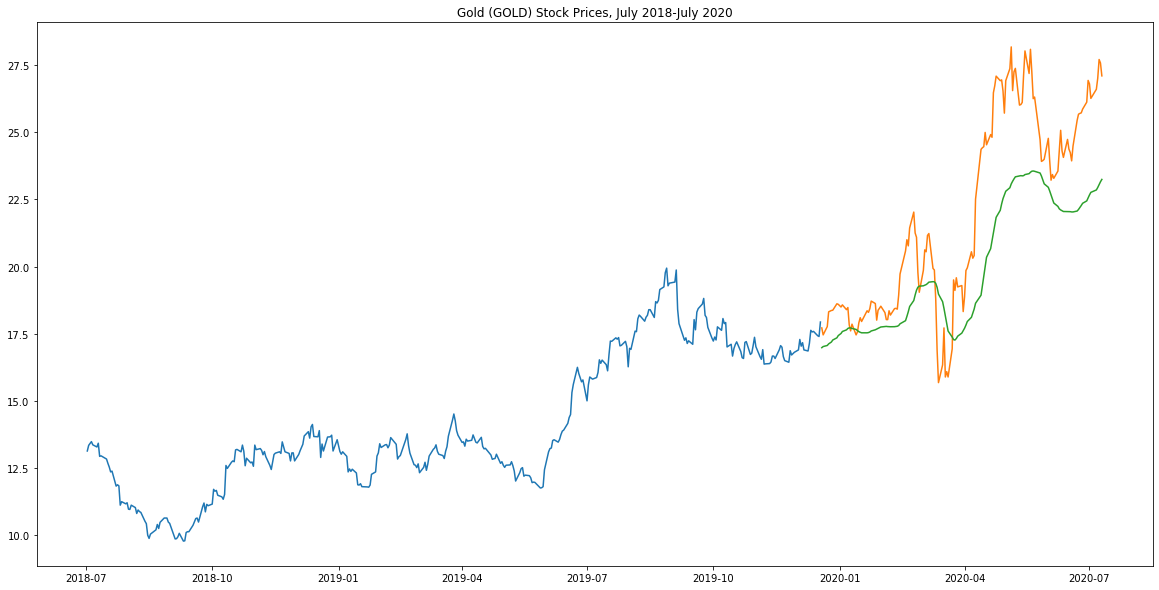

In [24]:
model_data = model_data.set_index("Date")
forecast_data = forecast_data.set_index("Date")
plt.plot(model_data["Close"])
plt.plot(forecast_data[['Close',"Prediction"]])
plt.title("Gold (GOLD) Stock Prices, July 2018-July 2020")
plt.savefig("../charts/GOLD.png")